2024-09-03 13:56:17.306 - ⏱️ time management initialized
2024-09-03 13:56:17 - 📈 Data Management Initialized
2024-09-03 13:56:17 - 📊 plot management initialized
Extended time range: 2023-09-28 06:37:04.100000 to 2023-09-28 06:37:09.400000
Requested time range ['2023-09-28/06:37:04.100000', '2023-09-28/06:37:09.400000'] exists within one chunk: 2023-09-28 06:00:00 to 2023-09-28 12:00:00
Loading data from pickle cache: pickle_cache/data_20230928_060000_to_20230928_120000.pkl
📈Called Plot With Derivatives in plotting.py
Computed moving average with 8-second window:
Computed moving average with 0.2-second window:
Computed moving average with 0.4-second window:
Computed moving average with 0.6-second window:
Computed moving average with 0.8-second window:
Computed moving average with 1-second window:
Computed moving average with 1.2-second window:
Computed moving average with 1.4-second window:
Computed moving average with 0.2-second window:
Computed moving average with 0.4-second window:
C

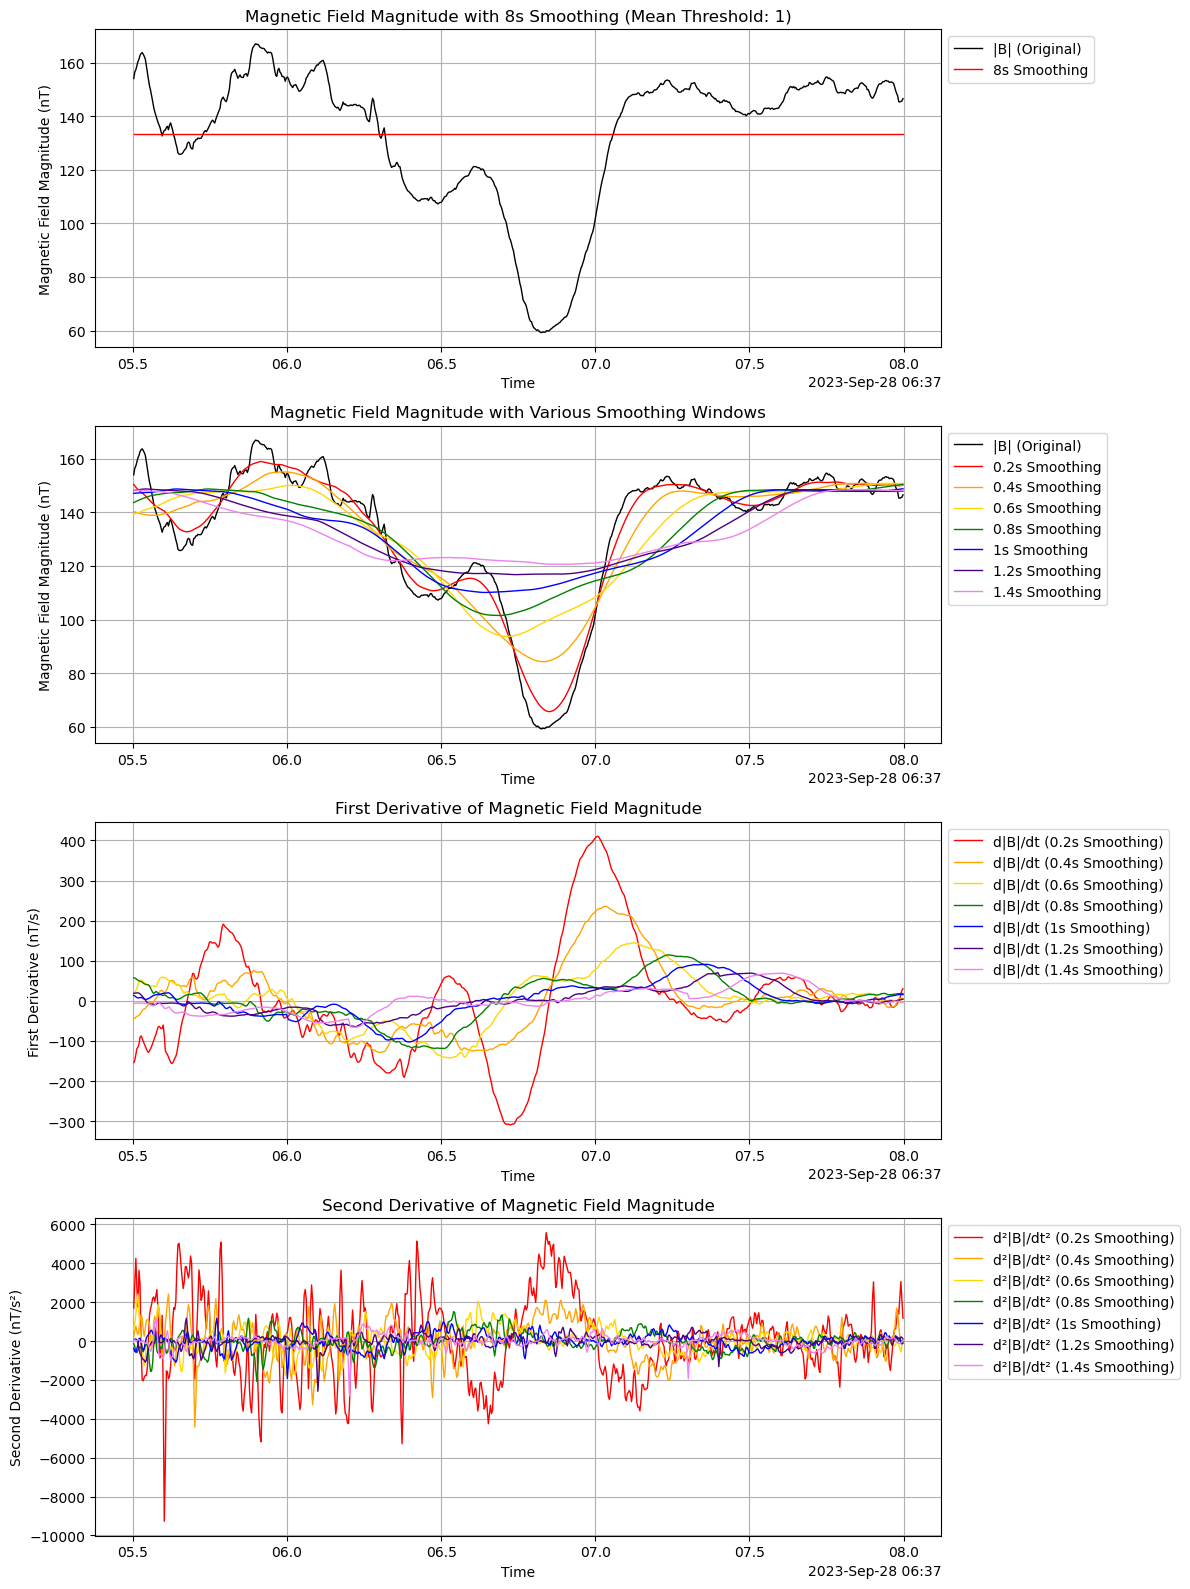

In [25]:
#Smooth Plotting with Derivatives 😎

import importlib

import time_management
importlib.reload(time_management)
from time_management import *

import data_management
importlib.reload(data_management)
from data_management import *

import plotting
importlib.reload(plotting)
from plotting import *

# -------- Meta-Controls -------- #
line_thickness = 1  # Adjust the thickness of all lines
INSTRUMENT_SAMPLING_RATE = 292.9  # Samples per second (adjust as needed)
mean_threshold = 1  # Multiplier for the mean threshold
use_calculated_sampling_rate = 1  # Option to use the calculated sampling rate (1 for True, 0 for False)


# -------- Smoothing Windows -------- #
# smoothing_windows = [.02, .04, .06, .08, .1, .12, .14]
# smoothing_windows = [.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
# smoothing_windows = [.25, .5, .75, 1, 1.25, 1.5, 1.75]
# smoothing_windows = [.1, .2, .3, .4, .5, .6, .7]
smoothing_windows = [.2, .4, .6, .8, 1, 1.2, 1.4]
# smoothing_windows = [.05, .1, .15, .2, .25, .3, .35]
# smoothing_windows = [.01, .02, .03, .04, .05, .06, .07]
# smoothing_windows = [.02, .04, .06, .08, .1, .12, .14]
# smoothing_windows = [.04, .05, .06, .07, .08, .09, .1]

# trange = ['2023-09-28/06:34:50', '2023-09-28/06:35:00']  # Messy Range
# trange = ['2023-09-28/06:37:05.500', '2023-09-28/06:37:08.000'] #Interesting Test Case

# trange = ['2023-09-28/06:39:31.000', '2023-09-28/06:39:35.000'] #⭐️⭐️⭐️ PERFECT Single hole for testing⭐️⭐️⭐️
trange = ['2023-09-28/06:37:05.500', '2023-09-28/06:37:08.000'] #Interesting Test Case WE'VE BEEN USING for Derivative

# -------- Determine Time Range -------- #
max_window_seconds = max(smoothing_windows)  # Determine the largest smoothing window
extended_trange = extend_time_range(trange, max_window_seconds)  # Extend the time range to account for the largest smoothing window
times, br, bt, bn, bmag = download_and_prepare_high_res_mag_data(extended_trange)  # Download and prepare the data for the extended time range

# -------- Clip to Original Time Range -------- #

times_clipped, bmag_clipped = clip_to_original_time_range(times, bmag, trange)  # Clip the smoothed results to the original time range

# -------- Determine Sampling Rate -------- #
sampling_rate_to_use = determine_sampling_rate(times, INSTRUMENT_SAMPLING_RATE, use_calculated_sampling_rate)  # Determine the sampling rate to use

# -------- Example Usage for Derivatives -------- #
# plot_derivatives_for_smoothing_windows(times_clipped, bmag_clipped, smoothing_windows, sampling_rate_to_use, line_thickness, mean_threshold)  # Plot the derivatives for the smoothed data
plot_with_derivatives(times_clipped, bmag_clipped, smoothing_windows, sampling_rate_to_use, line_thickness, mean_threshold)  # Plot the derivatives for the smoothed data
